#### Covid 19 data analysis

In [3]:
import pandas as pd

In [5]:
data=pd.read_csv("C:/Users/DELL/Downloads/covid_19_data.csv")
data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [6]:
data.count()

SNo                306429
ObservationDate    306429
Province/State     228326
Country/Region     306429
Last Update        306429
Confirmed          306429
Deaths             306429
Recovered          306429
dtype: int64

In [9]:
## null values
data.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [85]:
print(data.dtypes)

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

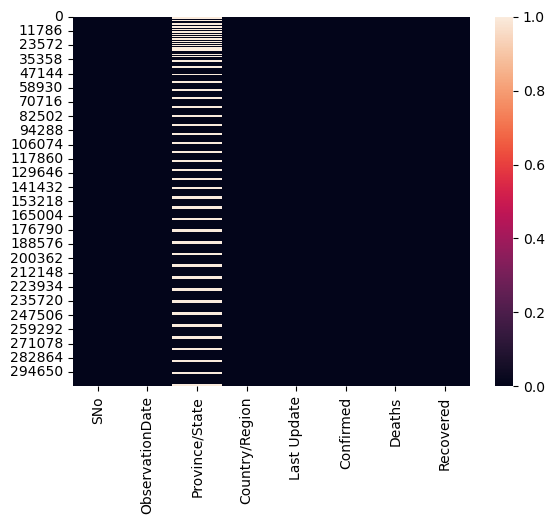

In [17]:
sns.heatmap(data.isnull())
plt.show()

In [19]:
## 1 no of confirmed death and recovered

In [21]:
data.head(3)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0


In [24]:
# Convert the 'ObservationDate' column to datetime format
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])

In [25]:

# Handle any missing values (optional, depending on your data)
data = data.fillna(0)

In [26]:
# Get basic summary statistics
print(data.describe())

                 SNo                ObservationDate     Confirmed  \
count  306429.000000                         306429  3.064290e+05   
mean   153215.000000  2020-11-06 01:54:54.146441728  8.567091e+04   
min         1.000000            2020-01-22 00:00:00 -3.028440e+05   
25%     76608.000000            2020-07-30 00:00:00  1.042000e+03   
50%    153215.000000            2020-11-10 00:00:00  1.037500e+04   
75%    229822.000000            2021-02-18 00:00:00  5.075200e+04   
max    306429.000000            2021-05-29 00:00:00  5.863138e+06   
std     88458.577156                            NaN  2.775516e+05   

              Deaths     Recovered  
count  306429.000000  3.064290e+05  
mean     2036.403268  5.042029e+04  
min      -178.000000 -8.544050e+05  
25%        13.000000  1.100000e+01  
50%       192.000000  1.751000e+03  
75%      1322.000000  2.027000e+04  
max    112385.000000  6.399531e+06  
std      6410.938048  2.015124e+05  


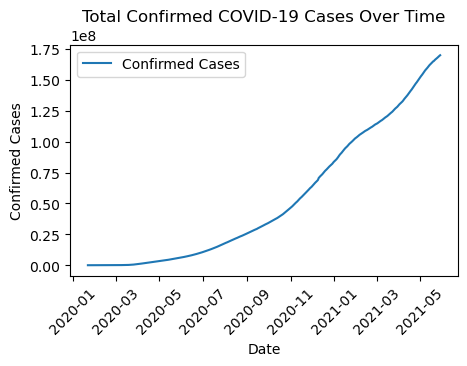

In [29]:
# Plot total confirmed cases over time
plt.figure(figsize=(5, 3))
total_confirmed = data.groupby('ObservationDate')['Confirmed'].sum()
plt.plot(total_confirmed.index, total_confirmed.values, label='Confirmed Cases')
plt.title('Total Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

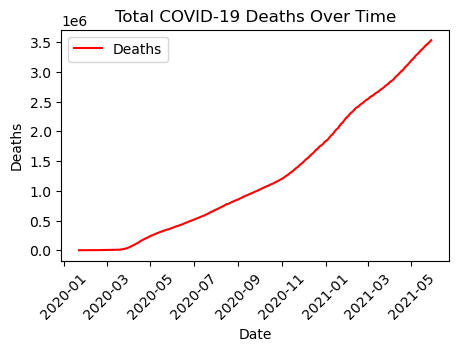

In [31]:
# Plot total deaths over time
plt.figure(figsize=(5, 3))
total_deaths = data.groupby('ObservationDate')['Deaths'].sum()
plt.plot(total_deaths.index, total_deaths.values, label='Deaths', color='red')
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.show()

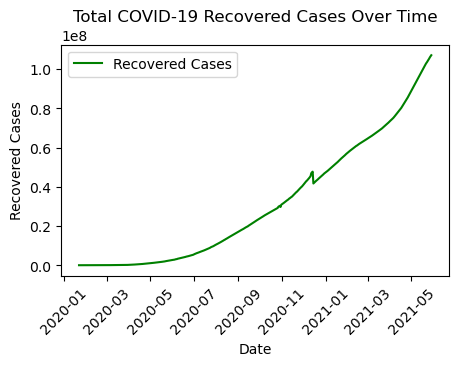

In [33]:
# Plot total recovered cases over time
plt.figure(figsize=(5, 3))
total_recovered = data.groupby('ObservationDate')['Recovered'].sum()
plt.plot(total_recovered.index, total_recovered.values, label='Recovered Cases', color='green')
plt.title('Total COVID-19 Recovered Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Recovered Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [35]:
# Analyze data by country/region
country_data = data.groupby('Country/Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()
country_data

,Country/Region,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,17026442.0,669075.0,13464399.0
3,Albania,19768869.0,375955.0,13945256.0
4,Algeria,27684358.0,834464.0,18959299.0
...,...,...,...,...
224,West Bank and Gaza,41819444.0,440378.0,37003116.0
225,Yemen,962066.0,237613.0,506523.0
226,Zambia,13493953.0,205990.0,12625626.0
227,Zimbabwe,6484581.0,237234.0,5594887.0


In [36]:
# Sort countries by total confirmed cases
country_data = country_data.sort_values(by='Confirmed', ascending=False)

In [37]:

# Top 10 countries with the most confirmed cases
top_10_countries = country_data.head(10)

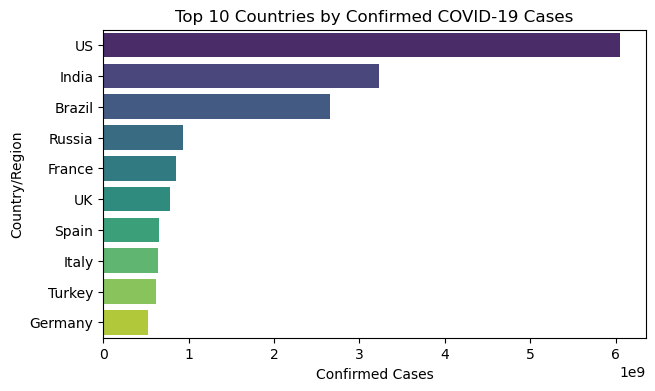

In [39]:
# Barplot for the top 10 countries with the most confirmed cases
plt.figure(figsize=(7, 4))
sns.barplot(x='Confirmed', y='Country/Region', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country/Region')
plt.show()

In [41]:
# Calculate death rate and recovery rate
country_data['Death Rate'] = country_data['Deaths'] / country_data['Confirmed'] * 100
country_data['Recovery Rate'] = country_data['Recovered'] / country_data['Confirmed'] * 100

# Sort by death rate
country_data_sorted_by_death_rate = country_data.sort_values(by='Death Rate', ascending=False)



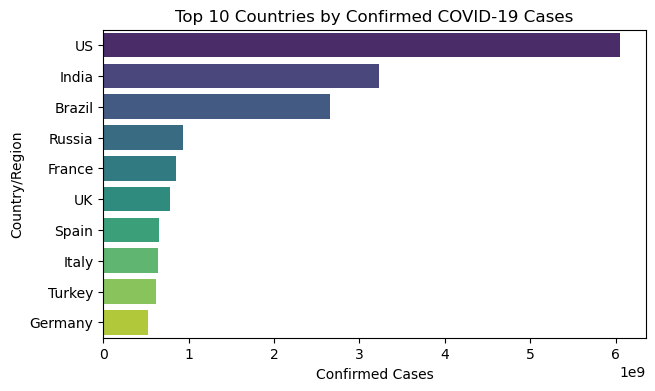

In [49]:
# Barplot for the top 10 countries with the most confirmed cases
plt.figure(figsize=(7, 4))
sns.barplot(x='Confirmed', y='Country/Region', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country/Region')
plt.show()

In [46]:
# Calculate death rate and recovery rate
country_data['Death Rate'] = country_data['Deaths'] / country_data['Confirmed'] * 100
country_data['Recovery Rate'] = country_data['Recovered'] / country_data['Confirmed'] * 100

# Sort by death rate
country_data_sorted_by_death_rate = country_data.sort_values(by='Death Rate', ascending=False)


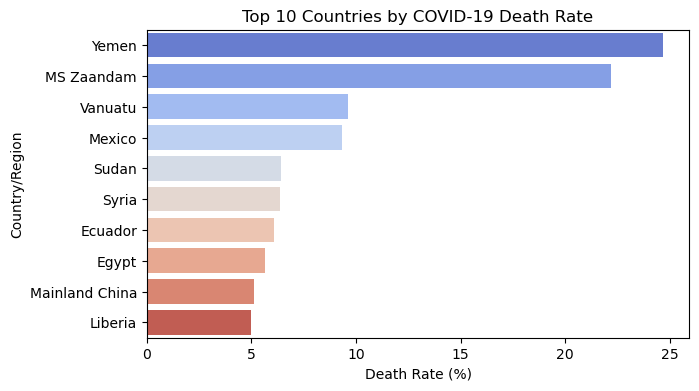

In [50]:
# Barplot of death rate of top countries
plt.figure(figsize=(7, 4))
sns.barplot(x='Death Rate', y='Country/Region', data=country_data_sorted_by_death_rate.head(10), palette='coolwarm')
plt.title('Top 10 Countries by COVID-19 Death Rate')
plt.xlabel('Death Rate (%)')
plt.ylabel('Country/Region')
plt.show()

In [58]:
# Convert 'ObservationDate' to datetime format
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])

# Group the data by 'ObservationDate' and apply aggregation functions
data_time = data.groupby('ObservationDate').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

In [59]:
data_time.head()

,ObservationDate,Confirmed,Deaths,Recovered
0,2020-01-22,557.0,17.0,30.0
1,2020-01-23,1097.0,34.0,60.0
2,2020-01-24,941.0,26.0,39.0
3,2020-01-25,1437.0,42.0,42.0
4,2020-01-26,2118.0,56.0,56.0


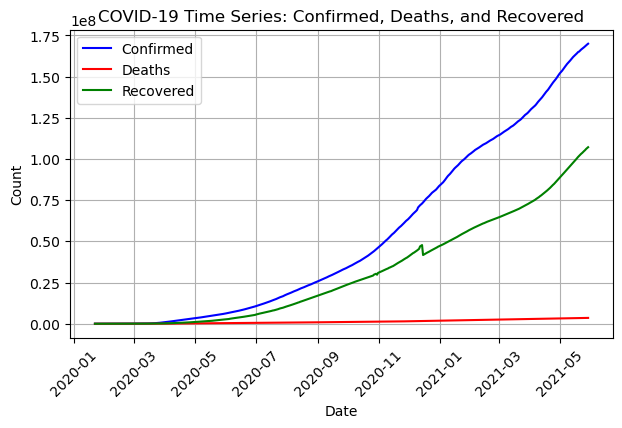

In [61]:
# Plotting the time series of Confirmed, Deaths, and Recovered over time
plt.figure(figsize=(7, 4))
plt.plot(data_time['ObservationDate'], data_time['Confirmed'], label='Confirmed', color='blue')
plt.plot(data_time['ObservationDate'], data_time['Deaths'], label='Deaths', color='red')
plt.plot(data_time['ObservationDate'], data_time['Recovered'], label='Recovered', color='green')
plt.title('COVID-19 Time Series: Confirmed, Deaths, and Recovered')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [62]:
# Group by 'Country/Region' and aggregate the total confirmed, deaths, and recovered cases
data_country = data.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

In [63]:
# Display the first few rows of the aggregated data
print(data_country.head())

# Sorting the data by 'Confirmed' cases in descending order
data_country_sorted = data_country.sort_values(by='Confirmed', ascending=False)

    Country/Region   Confirmed    Deaths   Recovered
0       Azerbaijan         1.0       0.0         0.0
1  ('St. Martin',)         2.0       0.0         0.0
2      Afghanistan  17026442.0  669075.0  13464399.0
3          Albania  19768869.0  375955.0  13945256.0
4          Algeria  27684358.0  834464.0  18959299.0


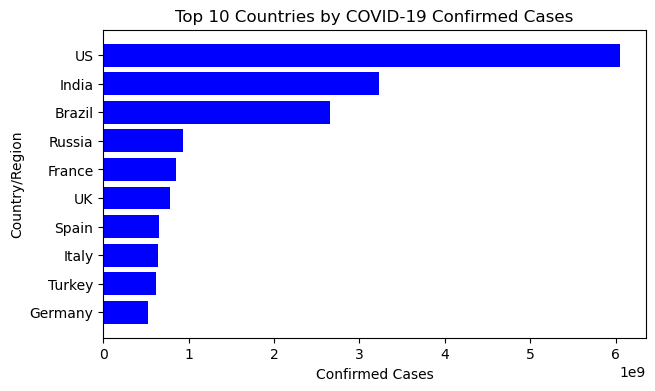

In [65]:
# Plotting the top 10 countries by confirmed cases
plt.figure(figsize=(7, 4))
plt.barh(data_country_sorted.head(10)['Country/Region'], data_country_sorted.head(10)['Confirmed'], color='blue')
plt.title('Top 10 Countries by COVID-19 Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country/Region')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

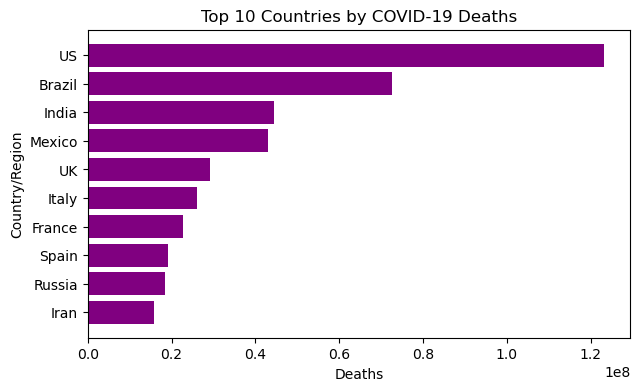

In [86]:
# Plotting deaths for the top 10 countries
plt.figure(figsize=(7, 4))
plt.barh(data_country_sorted.head(10)['Country/Region'], data_country_sorted.head(10)['Deaths'], color='purple')
plt.title('Top 10 Countries by COVID-19 Deaths')
plt.xlabel('Deaths')
plt.ylabel('Country/Region')
plt.gca().invert_yaxis()
plt.show()

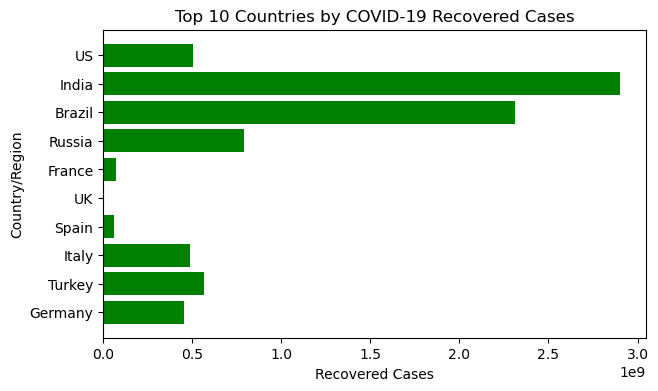

In [69]:
# Plotting recovered cases for the top 10 countries
plt.figure(figsize=(7, 4))
plt.barh(data_country_sorted.head(10)['Country/Region'], data_country_sorted.head(10)['Recovered'], color='green')
plt.title('Top 10 Countries by COVID-19 Recovered Cases')
plt.xlabel('Recovered Cases')
plt.ylabel('Country/Region')
plt.gca().invert_yaxis()
plt.show()

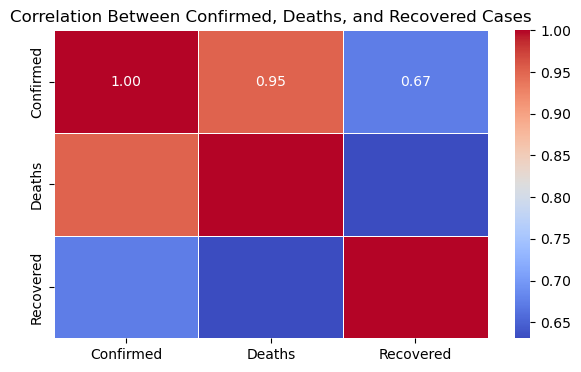

In [71]:
# Calculate the correlation matrix between Confirmed, Deaths, and Recovered
correlation_matrix = data_country[['Confirmed', 'Deaths', 'Recovered']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Confirmed, Deaths, and Recovered Cases')
plt.show()

In [72]:
# Display the total number of confirmed cases, deaths, and recoveries for each country
print(data_country)

                     Country/Region   Confirmed    Deaths   Recovered
0                        Azerbaijan         1.0       0.0         0.0
1                   ('St. Martin',)         2.0       0.0         0.0
2                       Afghanistan  17026442.0  669075.0  13464399.0
3                           Albania  19768869.0  375955.0  13945256.0
4                           Algeria  27684358.0  834464.0  18959299.0
..                              ...         ...       ...         ...
224              West Bank and Gaza  41819444.0  440378.0  37003116.0
225                           Yemen    962066.0  237613.0    506523.0
226                          Zambia  13493953.0  205990.0  12625626.0
227                        Zimbabwe   6484581.0  237234.0   5594887.0
228  occupied Palestinian territory        25.0       0.0         0.0

[229 rows x 4 columns]


In [75]:
# Identify the country/region with the highest number of confirmed cases
top_confirmed = data_country.loc[data_country['Confirmed'].idxmax()]
# Print the results
print("Country with the highest number of confirmed cases:")
print(top_confirmed[['Country/Region', 'Confirmed']])

Country with the highest number of confirmed cases:
Country/Region              US
Confirmed         6049145667.0
Name: 214, dtype: object


In [79]:
# Identify the country/region with the highest number of deaths
top_deaths = data_country.loc[data_country['Deaths'].idxmax()]
print("Country with the highest number of deaths:")
print(top_deaths[['Country/Region', 'Deaths']])

Country with the highest number of deaths:
Country/Region             US
Deaths            123303762.0
Name: 214, dtype: object


In [78]:
# Identify the country/region with the highest number of recoveries
top_recovered = data_country.loc[data_country['Recovered'].idxmax()]
print("Country with the highest number of recoveries:")
print(top_recovered[['Country/Region', 'Recovered']])


Country with the highest number of recoveries:
Country/Region           India
Recovered         2900589824.0
Name: 96, dtype: object


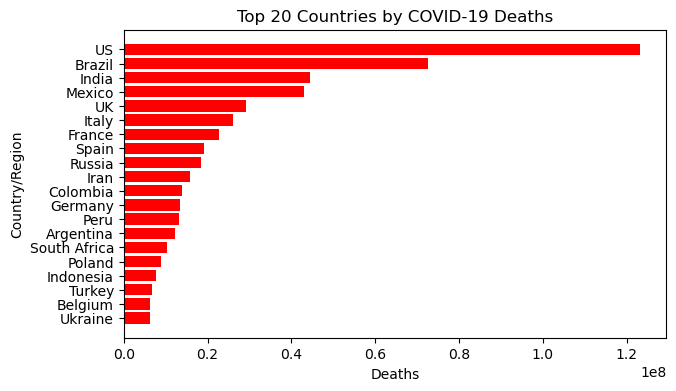

In [83]:
# Sort the data by 'Deaths' in descending order
data_country_sorted = data_country.sort_values(by='Deaths', ascending=False)

# Plotting the distribution of deaths using a bar chart
plt.figure(figsize=(7, 4))
plt.barh(data_country_sorted.head(20)['Country/Region'], data_country_sorted.head(20)['Deaths'], color='red')
plt.title('Top 20 Countries by COVID-19 Deaths')
plt.xlabel('Deaths')
plt.ylabel('Country/Region')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()